<a href="https://colab.research.google.com/github/niplessa/Thesis_Data-mining-study-on-medical-and-sociological-Data-regarding-Covid19/blob/main/EDA_1_covid19_EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### datasets accessed from: 

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data
(covid_19_data) cumulative confirmed/deaths/recoveries


---




### This is an attempt to analyse, plot and understand data regarding COVID-19 and it's spreading worldwide and Europe in particular.


#### Nikos Plessas, this work is part of my Thesis


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.graph_objs as go


In [ ]:
!pip install pycountry_convert #assing continent to country

In [ ]:
import folium
import pycountry_convert as pc


In [ ]:
path = "https://raw.githubusercontent.com/niplessa/Datasets/main/covid_19_data.csv"

#general dataset
df = pd.read_csv(path)

In [ ]:
df.loc[df['Country/Region'] == "UK", "Country/Region"] = "United Kingdom"
df.loc[df['Country/Region'] == "US", "Country/Region"] = "USA"


In [ ]:
#convert floats to int
df['Confirmed']=df['Confirmed'].astype('int64')
df['Recovered']=df['Recovered'].astype('int64')
df['Deaths']=df['Deaths'].astype('int64')


In [ ]:
df['ActiveCases'] = df['Confirmed'] - (df['Deaths'] + df['Recovered'])
#df['MortalityRate'] = (df['Deaths']*100/df['Confirmed'])

In [ ]:
'''#null values in Mortality Rate are caused from division by zer0. Change them to 0.

from numpy import inf
df['MortalityRate'][(df['MortalityRate']== -inf) | (df['MortalityRate']== inf)] = 0
df['MortalityRate'][(df['Deaths'] == 0) & (df['Confirmed'] == 0)] = 0'''

#Drop Province/State
df.drop('Province/State', axis=1, inplace=True)
df.drop('SNo', axis=1, inplace=True)

## Population data


In [ ]:
#import population data
pop18 = "https://raw.githubusercontent.com/rbiele02/07_clustering_covid_time_series/master/data/population_2018.csv"
population_2018 = pd.read_csv(pop18, index_col=0)
population_2018.rename(index={'United Kingdom': 'UK'}, inplace=True)

### Add continent variable to dataframe

In [ ]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

In [ ]:
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


In [ ]:
#get all countries
countries = np.asarray(df["Country/Region"])

df.insert(2,"Continent", [continents[country_to_continent_code(country)] for country in countries[:]])

In [ ]:
df.tail()

,ObservationDate,Country/Region,Continent,Last Update,Confirmed,Deaths,Recovered,ActiveCases
116800,09/23/2020,Ukraine,Europe,2020-09-24 04:23:38,3149,49,1158,1942
116801,09/23/2020,Netherlands,Europe,2020-09-24 04:23:38,1270,72,0,1198
116802,09/23/2020,Mainland China,Others,2020-09-24 04:23:38,1282,1,1272,9
116803,09/23/2020,Ukraine,Europe,2020-09-24 04:23:38,5191,92,2853,2246
116804,09/23/2020,Netherlands,Europe,2020-09-24 04:23:38,29513,1372,0,28141


In [ ]:
# Checking Missing Values
df.isnull().sum()

ObservationDate    0
Country/Region     0
Continent          0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
ActiveCases        0
dtype: int64

In [ ]:
df.isnull().sum()
#ok no more null values

ObservationDate    0
Country/Region     0
Continent          0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
ActiveCases        0
dtype: int64

In [ ]:
# Change date column to datetime data types
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['ObservationDate'] = df['ObservationDate'].apply(lambda x: x.date())
df.tail()

,ObservationDate,Country/Region,Continent,Last Update,Confirmed,Deaths,Recovered,ActiveCases
116800,2020-09-23,Ukraine,Europe,2020-09-24 04:23:38,3149,49,1158,1942
116801,2020-09-23,Netherlands,Europe,2020-09-24 04:23:38,1270,72,0,1198
116802,2020-09-23,Mainland China,Others,2020-09-24 04:23:38,1282,1,1272,9
116803,2020-09-23,Ukraine,Europe,2020-09-24 04:23:38,5191,92,2853,2246
116804,2020-09-23,Netherlands,Europe,2020-09-24 04:23:38,29513,1372,0,28141


In [ ]:
# Creating dataframes for global cases
conf = df.groupby(['ObservationDate']).sum()['Confirmed'].reset_index()
deat = df.groupby(['ObservationDate']).sum()['Deaths'].reset_index()
recov = df.groupby(['ObservationDate']).sum()['Recovered'].reset_index()
act = df.groupby(['ObservationDate']).sum()['ActiveCases'].reset_index()
global_cases = conf.merge(deat, on=['ObservationDate']).merge(recov, on=['ObservationDate']).merge(act, on=['ObservationDate']).set_index('ObservationDate')
global_cases['MortalityRate'] = global_cases['Deaths']*100/global_cases['Confirmed']
global_cases['RecoveryRate'] = global_cases['Recovered']*100/global_cases['Confirmed']


In [ ]:
global_cases.tail()
#agrees with worldometer

,Confirmed,Deaths,Recovered,ActiveCases,MortalityRate,RecoveryRate
ObservationDate,,,,,,
2020-09-19,30688150,955866,20922189,8810095,3.114772,68.176769
2020-09-20,30935011,959565,21159459,8815987,3.101874,68.399714
2020-09-21,31245797,963693,21394593,8887511,3.084232,68.471907
2020-09-22,31517087,969578,21624434,8923075,3.076357,68.611779
2020-09-23,31779835,975104,21890442,8914289,3.068310,68.881547


Text(0.5, 0, 'Month')

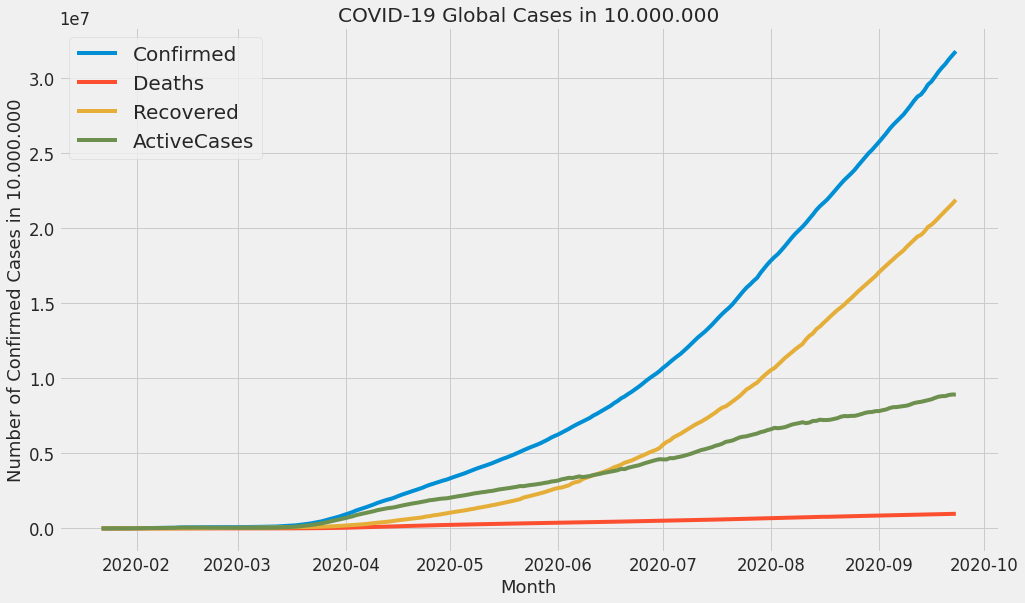

In [ ]:
plt.figure(figsize=[15,9])
sns.lineplot(x = global_cases.index, y = global_cases.Confirmed, legend='full')
sns.lineplot(x = global_cases.index, y = global_cases.Deaths, legend='full')
sns.lineplot(x = global_cases.index, y = global_cases.Recovered, legend='full')
sns.lineplot(x = global_cases.index, y = global_cases.ActiveCases, legend='full')
plt.title('COVID-19 Global Cases in 10.000.000')
plt.legend(global_cases, prop={'size': 20})
plt.ylabel('Number of Confirmed Cases in 10.000.000',fontsize=18)
plt.xlabel('Month',fontsize=18)


Text(0.5, 0, 'Date')

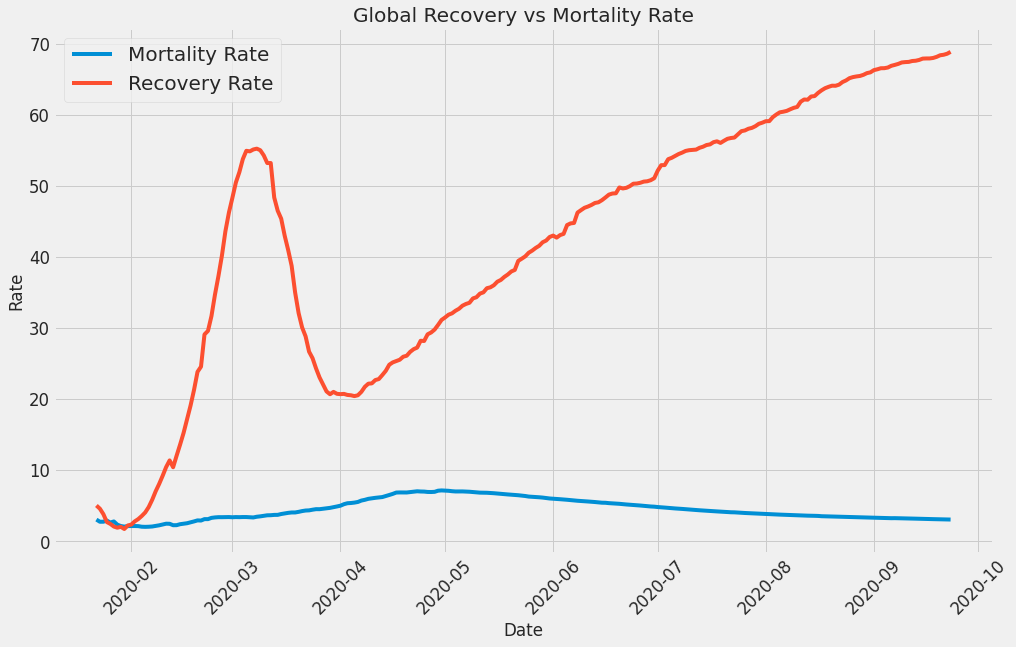

In [ ]:
plt.figure(figsize=[15,9])
sns.lineplot(x = global_cases.index, y = global_cases.MortalityRate, legend='full')
sns.lineplot(x = global_cases.index, y = global_cases.RecoveryRate, legend='full')
plt.title('Global Recovery vs Mortality Rate')
plt.legend(['Mortality Rate','Recovery Rate'], prop={'size': 20})
plt.xticks(rotation=45)
plt.ylabel('Rate')
plt.xlabel('Date')

In [ ]:
from datetime import date
import datetime

#Εύρεση μεγαλύτερης ημερομηνίας του Dataset
d = df['ObservationDate'][-1:].astype('str')
year = int(d.values[0].split('-')[0])
month = int(d.values[0].split('-')[1])
day = int(d.values[0].split('-')[2].split()[0])

print("\nLast update: {}-{}-{}\n".format(year,month,day))
last_date = str(day)+"-"+str(month)+"-"+str(year)
#print(last_date)

#data_latest : last date in datetime
data_latest = df[df['ObservationDate'] >= pd.Timestamp(date(year,month,day))]
cases = pd.DataFrame(data_latest.groupby('Country/Region').sum()).reset_index(drop=None)
country_stats = cases[['Country/Region','Confirmed','Deaths','Recovered','ActiveCases']]
country_stats['MortalityRate'] = country_stats['Deaths']*100/country_stats['Confirmed']
country_stats['LastUpdate'] = last_date

#assign continent to country
countries = np.asarray(country_stats["Country/Region"])
country_stats.insert(2,"Continent", [continents[country_to_continent_code(country)] for country in countries[:]])

country_stats=country_stats.sort_values(by=['Confirmed'],ascending=False).reset_index(drop=True)
country_stats.style.background_gradient(cmap='Reds')



Last update: 2020-9-23



,Country/Region,Confirmed,Continent,Deaths,Recovered,ActiveCases,MortalityRate,LastUpdate
0,USA,6933548,North America,201884,2670256,4061408,2.911698,23-9-2020
1,India,5646010,Asia,90020,4587613,968377,1.594400,23-9-2020
2,Brazil,4591364,South America,138105,4046827,406432,3.007930,23-9-2020
3,Russia,1117487,Europe,19720,920602,177165,1.764674,23-9-2020
4,Colombia,784268,South America,24746,662277,97245,3.155299,23-9-2020
5,Peru,776546,South America,31568,636489,108489,4.065181,23-9-2020
6,Mexico,710049,North America,74949,601611,33489,10.555469,23-9-2020
7,Spain,693556,Europe,31034,150376,512146,4.474621,23-9-2020
8,South Africa,665188,Africa,16206,594229,54753,2.436304,23-9-2020
9,Argentina,664799,South America,14376,525486,124937,2.162458,23-9-2020


#World Plots

<function matplotlib.pyplot.show>

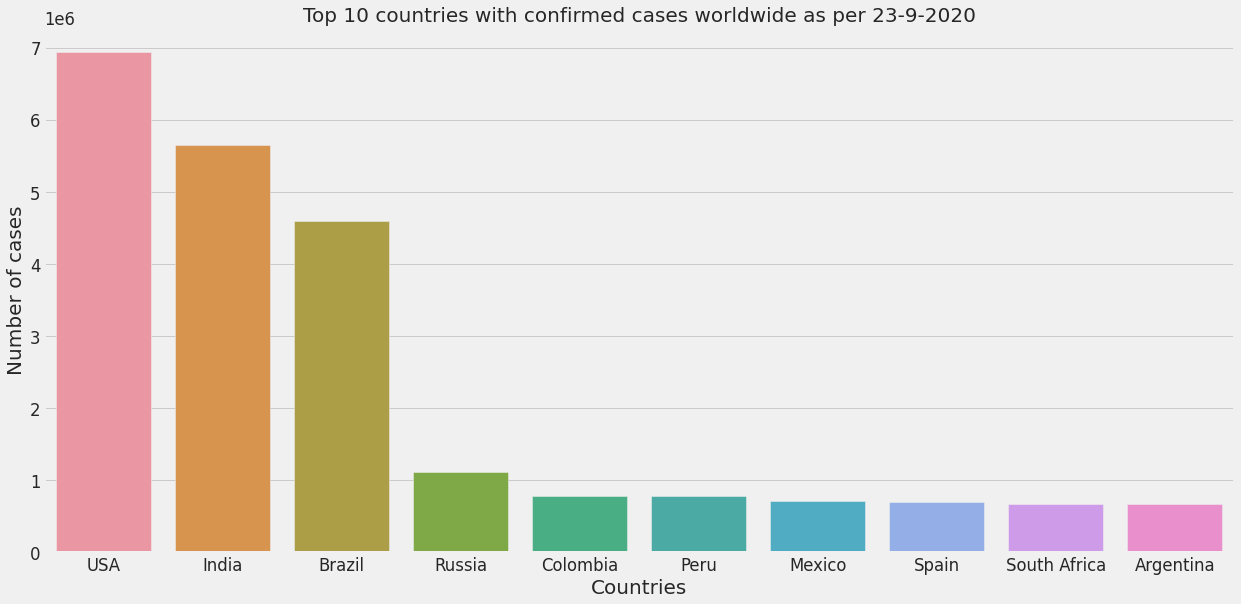

In [ ]:
plt.figure(figsize=[19,9])
sns.barplot(x="Country/Region",
            y="Confirmed",
            data=country_stats.sort_values('Confirmed', ascending=False).head(10),
           )
plt.title("Top 10 countries with confirmed cases worldwide as per {}".format(last_date),fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Countries',fontsize=20)
plt.figure
plt.show

Text(0.5, 0, 'Countries')

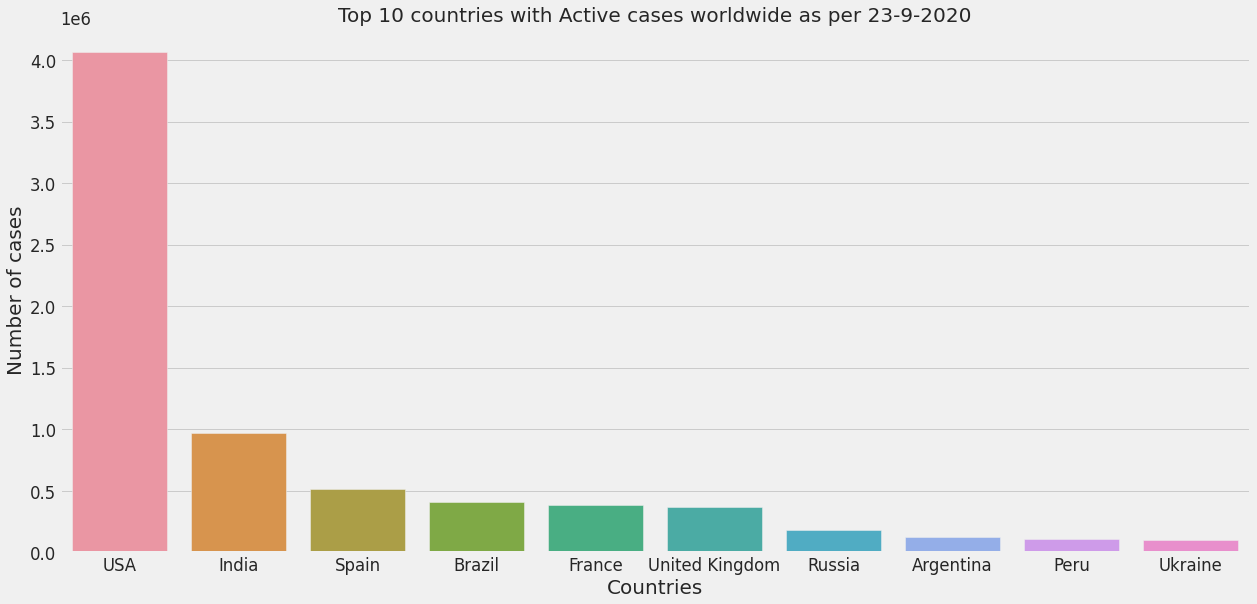

In [ ]:
plt.figure(figsize=[19,9])
sns.barplot(x="Country/Region",
            y="ActiveCases",
            data=country_stats.sort_values('ActiveCases', ascending=False).head(10),
           )
plt.title("Top 10 countries with Active cases worldwide as per {}".format(last_date),fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Countries',fontsize=20)


Text(0.5, 0, 'Countries')

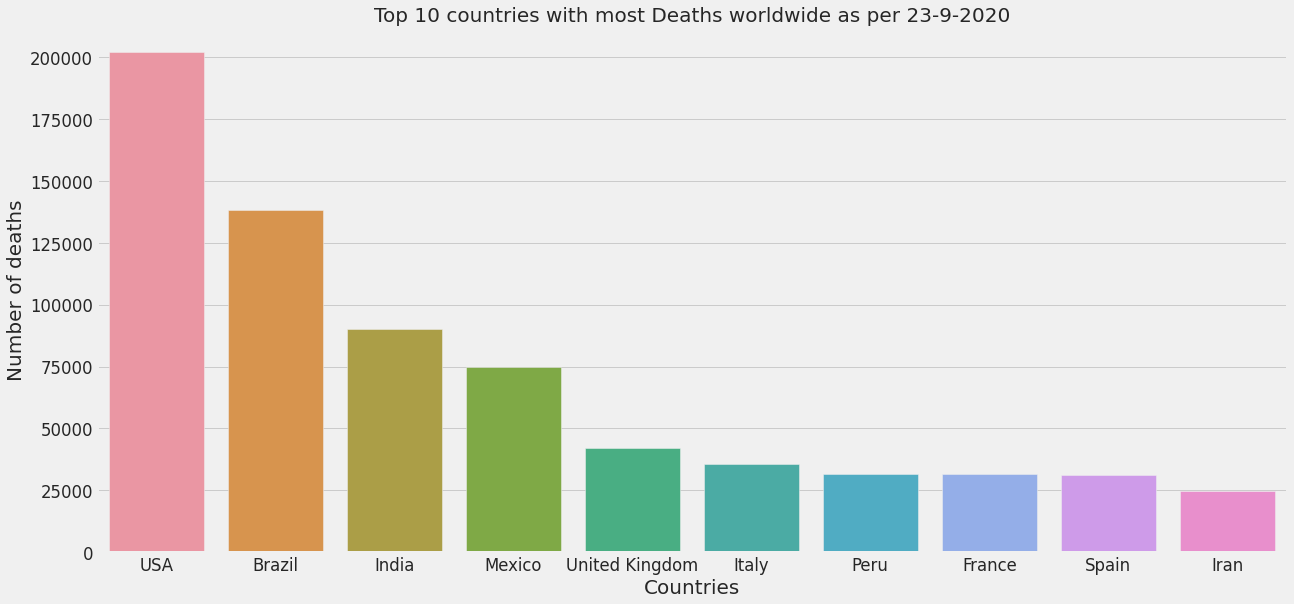

In [ ]:
plt.figure(figsize=[19,9])
sns.barplot(x="Country/Region",
            y="Deaths",
            data=country_stats.sort_values('Deaths', ascending=False).head(10),
           )
plt.title("Top 10 countries with most Deaths worldwide as per {}".format(last_date),fontsize=20)
plt.ylabel('Number of deaths',fontsize=20)
plt.xlabel('Countries',fontsize=20)

### Put Continent Variable in dataframe and work with Europe


In [ ]:
df_Europe = country_stats[country_stats["Continent"]=='Europe']

In [ ]:
df_Europe=df_Europe.sort_values(by=['Confirmed'],ascending=False).reset_index(drop=True)

In [ ]:
df_Europe.head()

,Country/Region,Confirmed,Continent,Deaths,Recovered,ActiveCases,MortalityRate,LastUpdate
0,Russia,1117487,Europe,19720,920602,177165,1.764674,23-9-2020
1,Spain,693556,Europe,31034,150376,512146,4.474621,23-9-2020
2,France,508456,Europe,31447,96498,380511,6.184803,23-9-2020
3,United Kingdom,412245,Europe,41951,2247,368047,10.176230,23-9-2020
4,Italy,302537,Europe,35758,220665,46114,11.819381,23-9-2020


In [ ]:
population_2018.index

Index(['China', 'India', 'US', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Japan',
       ...
       'Saint Lucia', 'Grenada', 'Saint Vincent and the Grenadines', 'Seychelles', 'Antigua and Barbuda', 'Andorra', 'Dominica', 'Saint Kitts and Nevis', 'Monaco', 'Liechtenstein'], dtype='object', length=183)

## Plots for European Countries


<function matplotlib.pyplot.show>

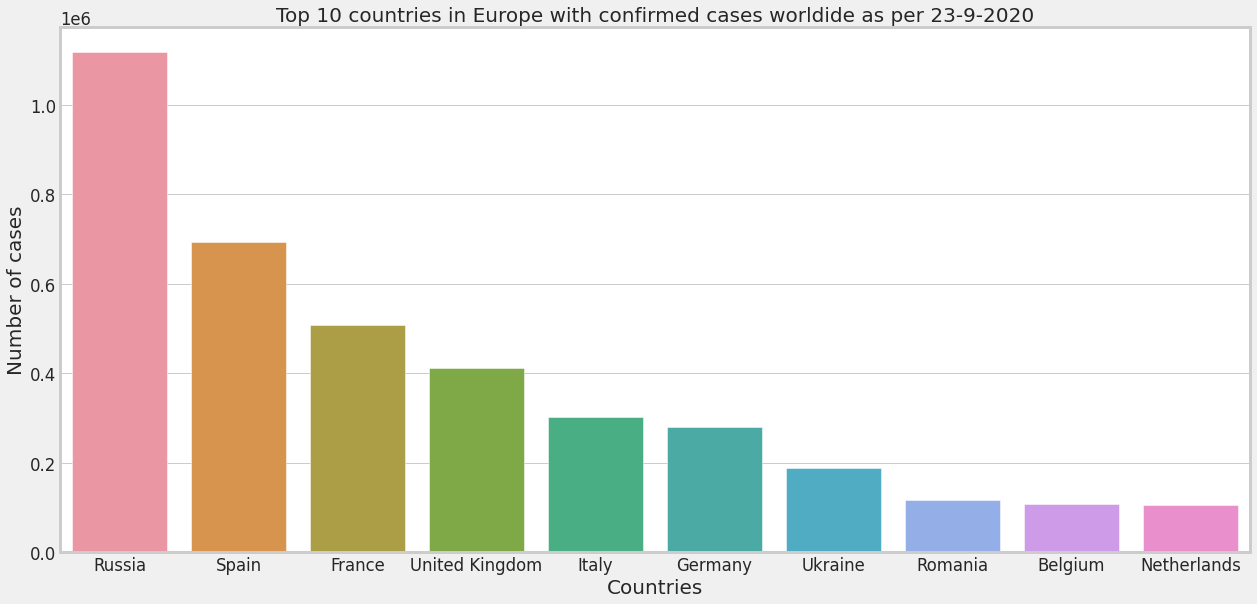

In [ ]:
plt.figure(figsize=[19,9])
sns.set_style("whitegrid")
sns.barplot(x="Country/Region",
            y="Confirmed",
            data=df_Europe.sort_values('Confirmed', ascending=False).head(10),
           )
plt.title("Top 10 countries in Europe with confirmed cases worldide as per {}".format(last_date),fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Countries',fontsize=20)
plt.figure
plt.show

<function matplotlib.pyplot.show>

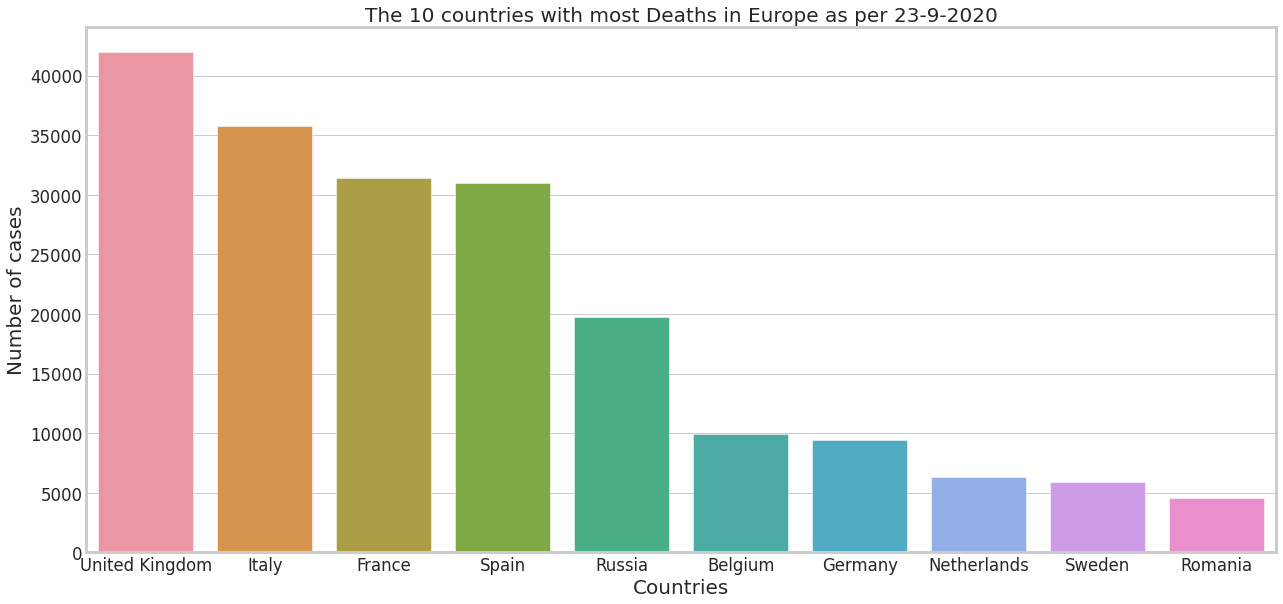

In [ ]:
plt.figure(figsize=[19,9])
sns.set_style("whitegrid")
sns.barplot(x="Country/Region",
            y="Deaths",
            data=df_Europe.sort_values('Deaths', ascending=False).head(10),
           )
plt.title("The 10 countries with most Deaths in Europe as per {}".format(last_date),fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Countries',fontsize=20)
plt.figure
plt.show

In [ ]:
df_Europe=df_Europe.sort_values(by=['Confirmed'],ascending=False).reset_index(drop=True)
df_Europe.style.background_gradient(cmap='Reds')


,Country/Region,Confirmed,Continent,Deaths,Recovered,ActiveCases,MortalityRate,LastUpdate
0,Russia,1117487,Europe,19720,920602,177165,1.764674,23-9-2020
1,Spain,693556,Europe,31034,150376,512146,4.474621,23-9-2020
2,France,508456,Europe,31447,96498,380511,6.184803,23-9-2020
3,United Kingdom,412245,Europe,41951,2247,368047,10.176230,23-9-2020
4,Italy,302537,Europe,35758,220665,46114,11.819381,23-9-2020
5,Germany,279025,Europe,9423,245706,23896,3.377117,23-9-2020
6,Ukraine,189488,Europe,3784,84767,100937,1.996960,23-9-2020
7,Romania,116415,Europe,4550,93558,18307,3.908431,23-9-2020
8,Belgium,106887,Europe,9959,19079,77849,9.317316,23-9-2020
9,Netherlands,105304,Europe,6344,3143,95817,6.024463,23-9-2020


## Europe plots vs Time

In [ ]:
# Creating dataframes for Europe cases vs time
eur_cas = df[df['Continent']=='Europe']
confEur = eur_cas.groupby(['ObservationDate']).sum()['Confirmed'].reset_index()
deatEur = eur_cas.groupby(['ObservationDate']).sum()['Deaths'].reset_index()
recovEur = eur_cas.groupby(['ObservationDate']).sum()['Recovered'].reset_index()
actEur = eur_cas.groupby(['ObservationDate']).sum()['ActiveCases'].reset_index()
Europe_cases = confEur.merge(deatEur, on=['ObservationDate']).merge(recovEur, on=['ObservationDate']).merge(actEur, on=['ObservationDate']).set_index('ObservationDate')
Europe_cases['MortalityRate'] = Europe_cases['Deaths']/Europe_cases['Confirmed']
Europe_cases['RecoveryRate'] = Europe_cases['Recovered']/Europe_cases['Confirmed']


Text(0.5, 0, 'Month')

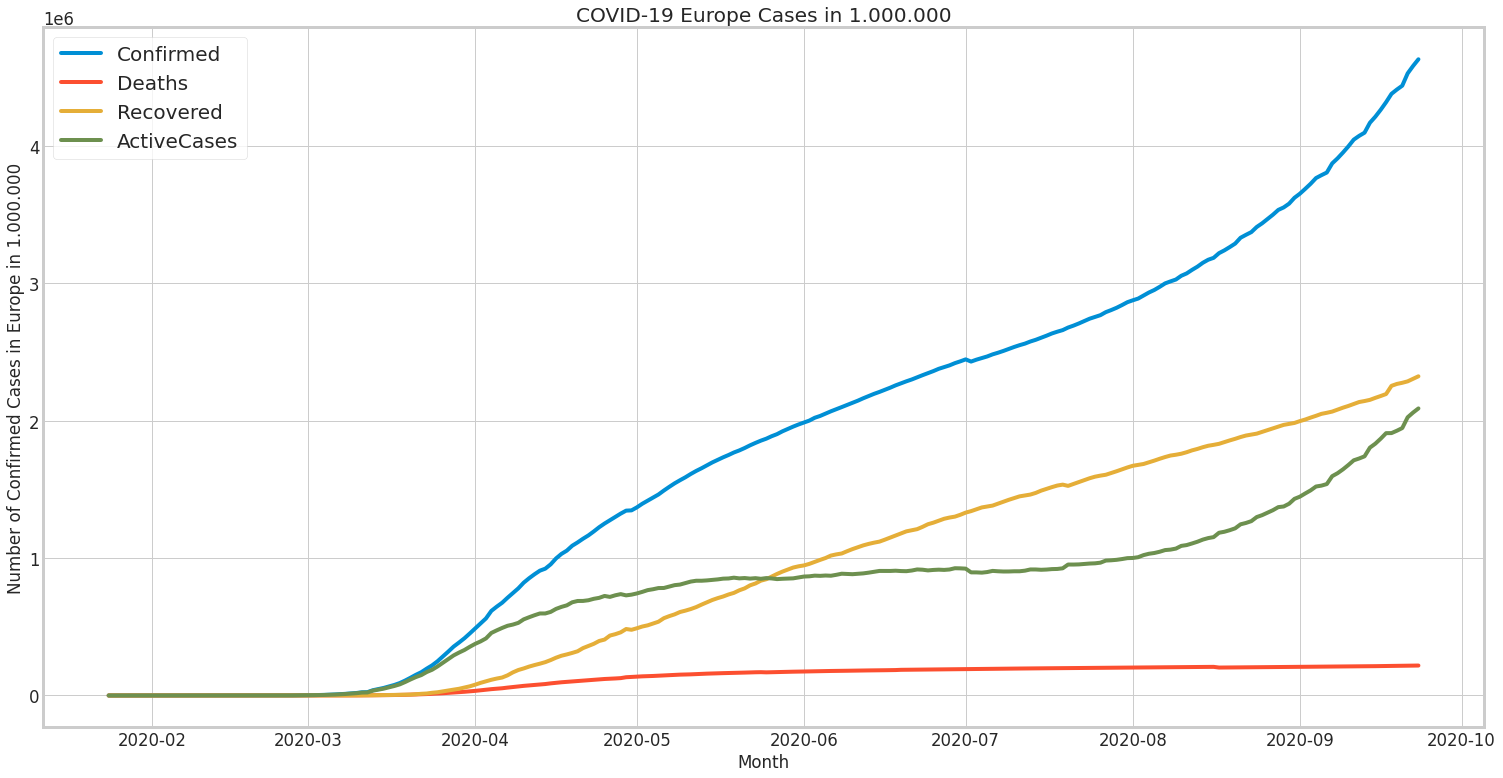

In [ ]:
#Confirmed,Deaths,Active Cases in Europe vs time
plt.figure(figsize=[23,12])
sns.lineplot(x = Europe_cases.index, y = Europe_cases.Confirmed, legend='full')
sns.lineplot(x = Europe_cases.index, y = Europe_cases.Deaths, legend='full')
sns.lineplot(x = Europe_cases.index, y = Europe_cases.Recovered, legend='full')
sns.lineplot(x = Europe_cases.index, y = Europe_cases.ActiveCases, legend='full')
plt.title('COVID-19 Europe Cases in 1.000.000')
plt.legend(Europe_cases, prop={'size': 20})
plt.ylabel('Number of Confirmed Cases in Europe in 1.000.000')
plt.xlabel('Month')


Text(0.5, 0, 'Date')

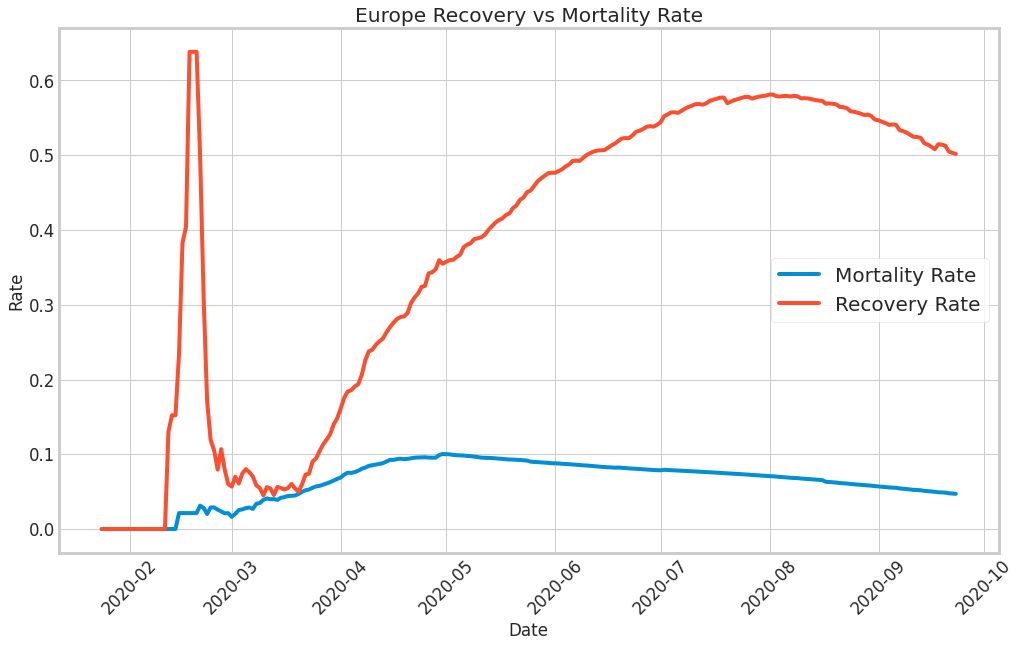

In [ ]:
#mortality and recovery rate
plt.figure(figsize=[15,9])
sns.lineplot(x = Europe_cases.index, y = Europe_cases.MortalityRate, legend='full')
sns.lineplot(x = Europe_cases.index, y = Europe_cases.RecoveryRate, legend='full')
plt.title('Europe Recovery vs Mortality Rate')
plt.legend(['Mortality Rate','Recovery Rate'], prop={'size': 20})
plt.xticks(rotation=45)
plt.ylabel('Rate')
plt.xlabel('Date')

In [ ]:
#function to create a dataframe for each country

def country_cases(c):
    c=df[df['Country/Region']==c].reset_index(drop=True)
    conf = c.groupby(['ObservationDate']).sum()['Confirmed'].reset_index()
    death = c.groupby(['ObservationDate']).sum()['Deaths'].reset_index()
    recov = c.groupby(['ObservationDate']).sum()['Recovered'].reset_index()
    act = c.groupby(['ObservationDate']).sum()['ActiveCases'].reset_index()
    #merge series in a single DataFrame
    c_cases = conf.merge(death, on=['ObservationDate']).merge(recov, on=['ObservationDate']).merge(act, on=['ObservationDate']).set_index('ObservationDate')
    c_cases['MortalityRate'] = c_cases['Deaths']*100/c_cases['Confirmed']
    return(c_cases)


In [ ]:
Italy_cases=country_cases("Italy")
UK_cases = country_cases("United Kingdom")
Spain_cases = country_cases("Spain")
Russia_cases = country_cases("Russia")
France_cases = country_cases("France")

most_affected = ["Italy","UK","Spain","Russia","France"]


Text(0.5, 0, 'Month')

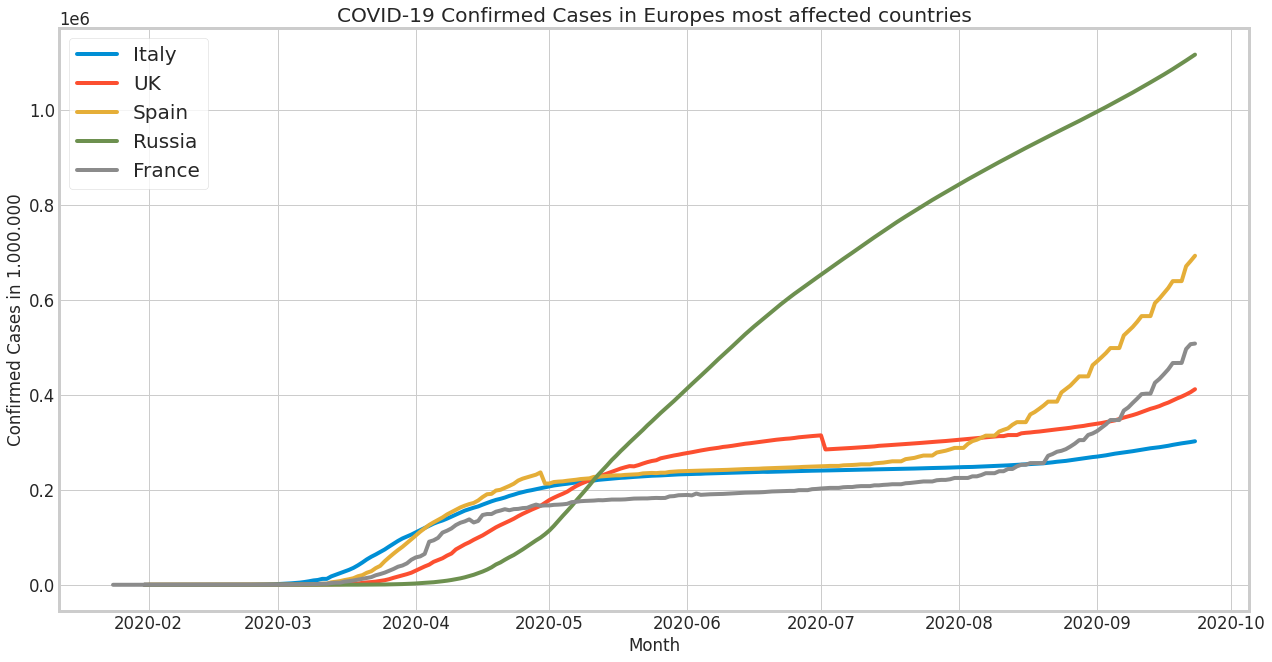

In [ ]:
#plot Confirmed
plt.figure(figsize=[19,10])
sns.lineplot(x = Italy_cases.index, y =Italy_cases.Confirmed, legend="full")
sns.lineplot(x = UK_cases.index, y =UK_cases.Confirmed, legend="full")
sns.lineplot(x = Spain_cases.index, y =Spain_cases.Confirmed, legend="full")
sns.lineplot(x = Russia_cases.index, y =Russia_cases.Confirmed, legend="full")
sns.lineplot(x = France_cases.index, y =France_cases.Confirmed, legend="full")

plt.title('COVID-19 Confirmed Cases in Europes most affected countries')
plt.legend(most_affected, prop={'size': 20})
plt.ylabel('Confirmed Cases in 1.000.000')
plt.xlabel('Month')

Text(0.5, 0, 'Month')

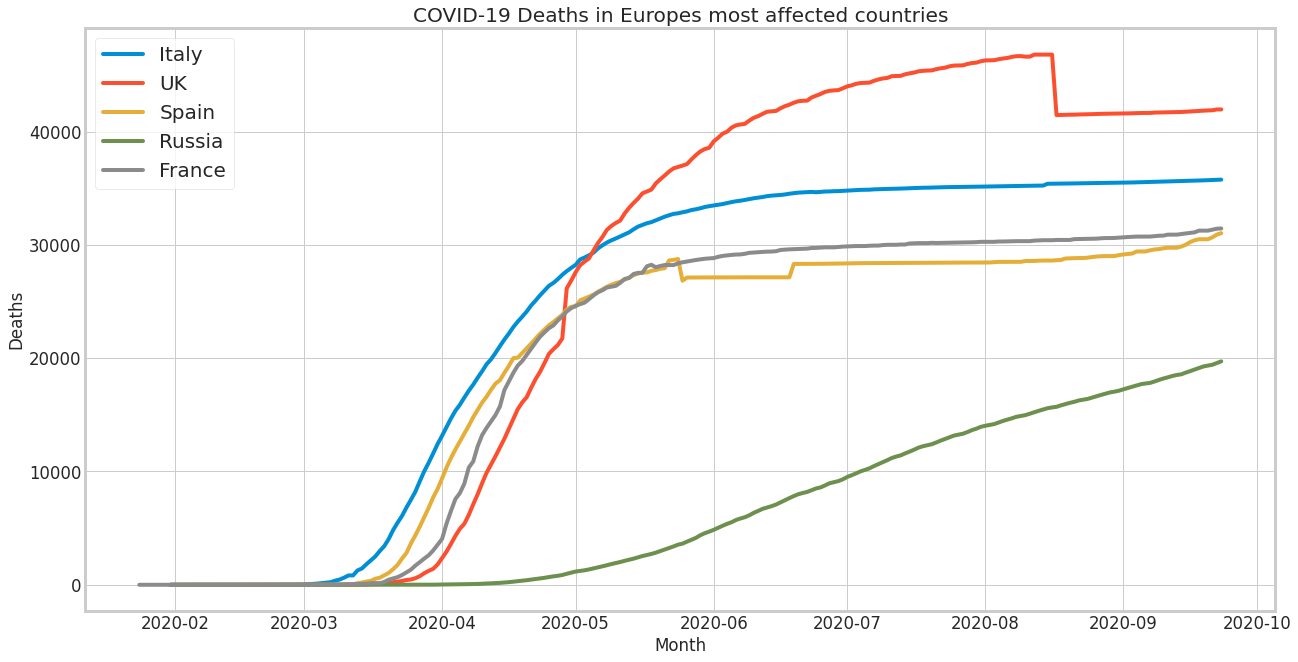

In [ ]:
#plot Deaths
plt.figure(figsize=[19,10])
sns.lineplot(x = Italy_cases.index, y =Italy_cases.Deaths, legend="full")
sns.lineplot(x = UK_cases.index, y =UK_cases.Deaths, legend="full")
sns.lineplot(x = Spain_cases.index, y =Spain_cases.Deaths, legend="full")
sns.lineplot(x = Russia_cases.index, y =Russia_cases.Deaths, legend="full")
sns.lineplot(x = France_cases.index, y =France_cases.Deaths, legend="full")

plt.title('COVID-19 Deaths in Europes most affected countries')
plt.legend(most_affected, prop={'size': 20})
plt.ylabel('Deaths')
plt.xlabel('Month')

Text(0.5, 0, 'Month')

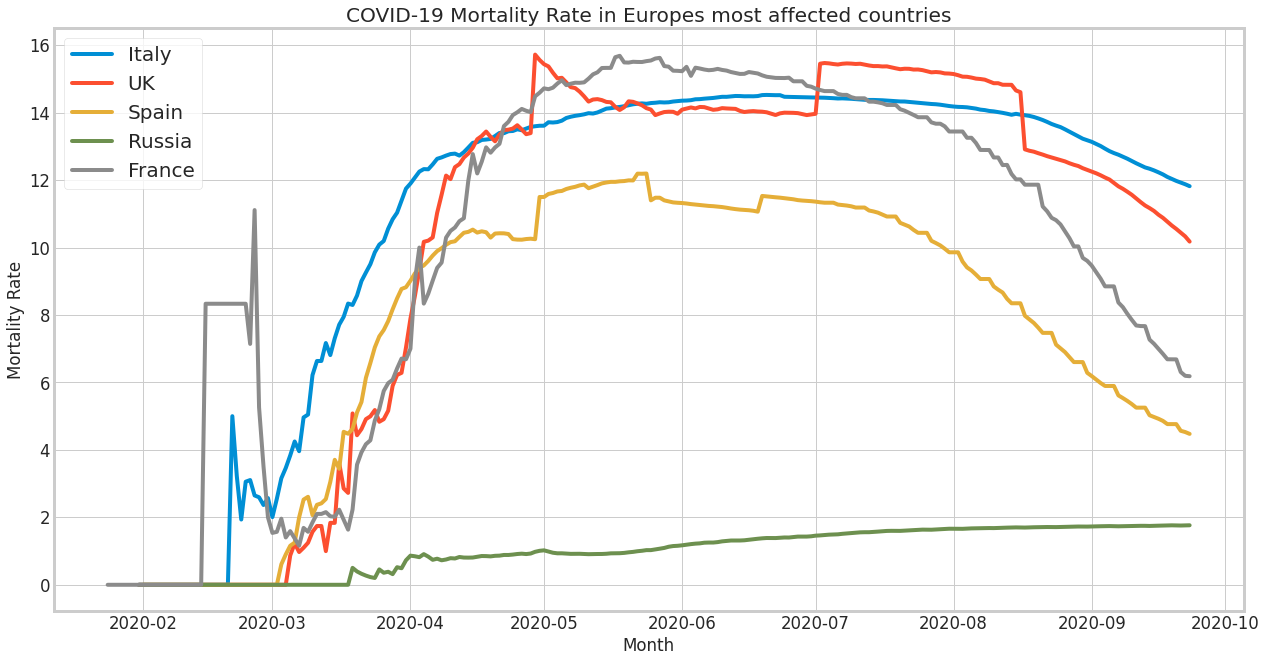

In [ ]:
#plot Mortality Rate
plt.figure(figsize=[19,10])
sns.lineplot(x = Italy_cases.index, y =Italy_cases.MortalityRate, legend="full")
sns.lineplot(x = UK_cases.index, y =UK_cases.MortalityRate, legend="full")
sns.lineplot(x = Spain_cases.index, y =Spain_cases.MortalityRate, legend="full")
sns.lineplot(x = Russia_cases.index, y =Russia_cases.MortalityRate, legend="full")
sns.lineplot(x = France_cases.index, y =France_cases.MortalityRate, legend="full")

plt.title('COVID-19 Mortality Rate in Europes most affected countries')
plt.legend(most_affected, prop={'size': 20})
plt.ylabel('Mortality Rate')
plt.xlabel('Month')

In [ ]:
#let's study Greece
Greece_cases=country_cases("Greece")

Text(0.5, 0, 'Month')

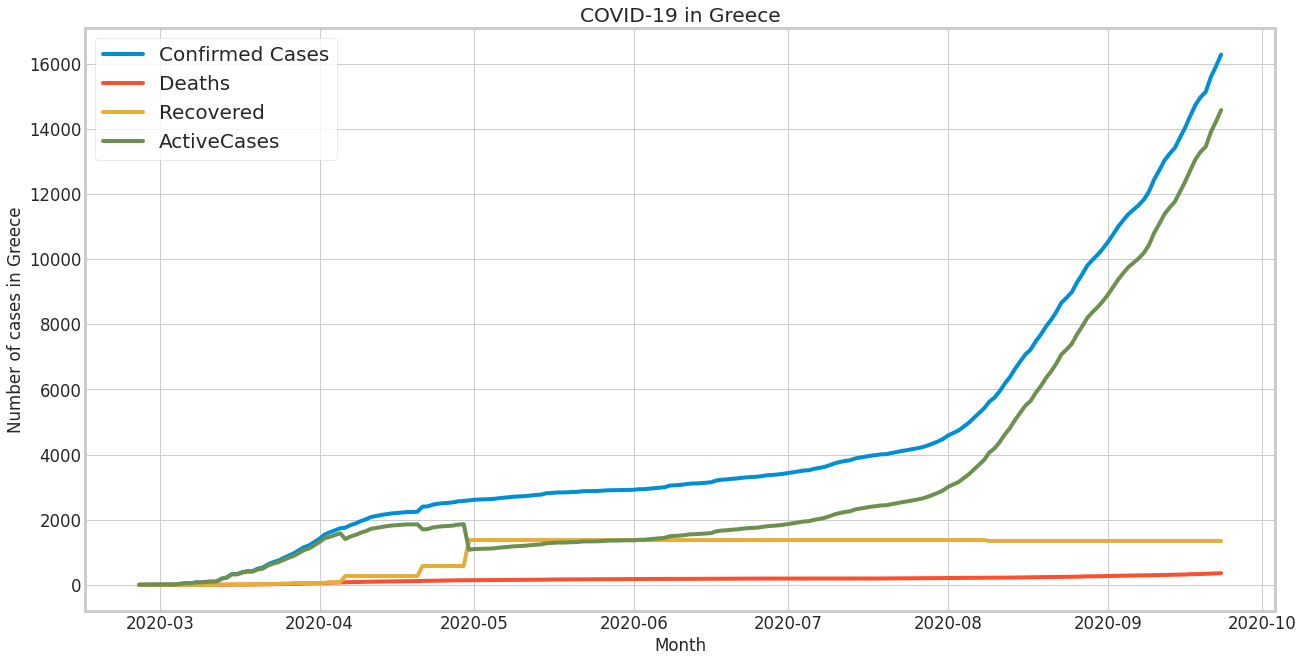

In [ ]:
#plot confirmed,deaths etc
plt.figure(figsize=[19,10])
sns.lineplot(x = Greece_cases.index, y =Greece_cases.Confirmed, legend="full")
sns.lineplot(x = Greece_cases.index, y =Greece_cases.Deaths, legend="full")
sns.lineplot(x = Greece_cases.index, y =Greece_cases.Recovered, legend="full")
sns.lineplot(x = Greece_cases.index, y =Greece_cases.ActiveCases, legend="full")


leg=["Confirmed Cases","Deaths","Recovered","ActiveCases"]
plt.title('COVID-19 in Greece')
plt.legend(leg, prop={'size': 20})
plt.ylabel('Number of cases in Greece')
plt.xlabel('Month')

Text(0.5, 0, 'Month')

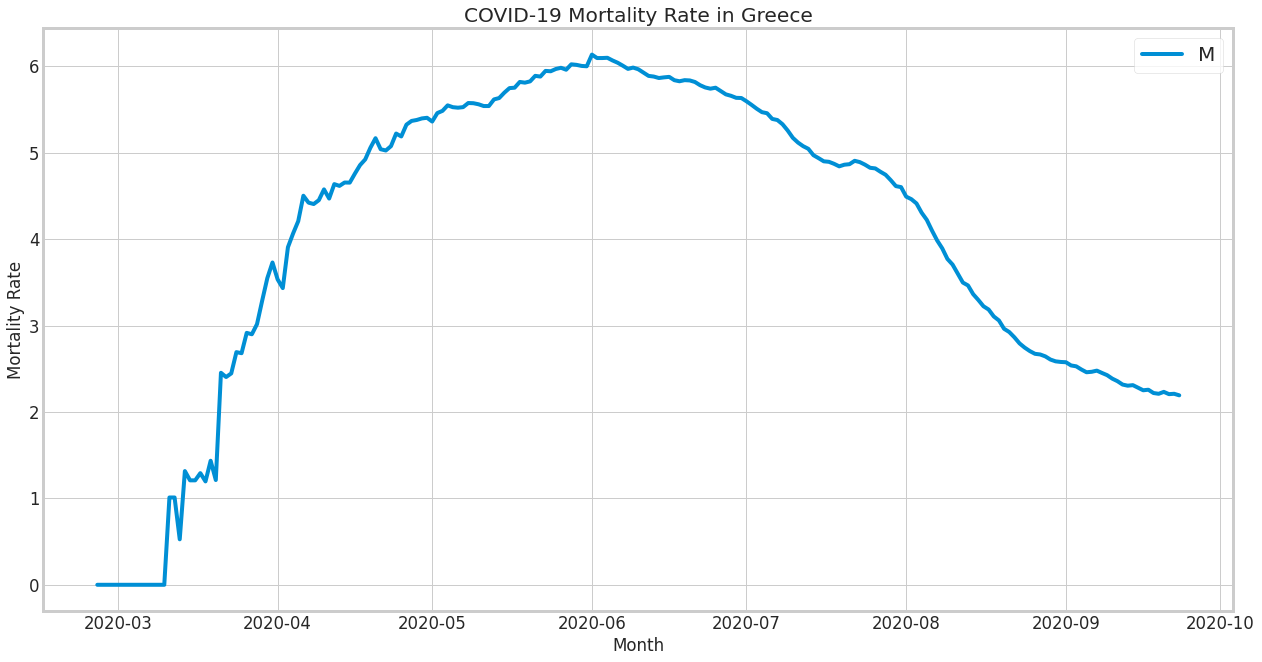

In [ ]:
#plot Mortality Rate in Greece
plt.figure(figsize=[19,10])
sns.lineplot(x = Greece_cases.index, y =Greece_cases.MortalityRate)
leg="Mortality Rate"
plt.title('COVID-19 Mortality Rate in Greece')
plt.legend(leg, prop={'size': 20})
plt.ylabel('Mortality Rate')
plt.xlabel('Month')

#Cases per 100.000 residents

In [ ]:
#import population data
pop18 = "https://raw.githubusercontent.com/rbiele02/07_clustering_covid_time_series/master/data/population_2018.csv"
population_2018 = pd.read_csv(pop18)

In [ ]:
population_2018.head()

,Unnamed: 0,Value
0,China,1392730000
1,India,1352617328
2,US,326687501
3,Indonesia,267663435
4,Pakistan,212215030


In [ ]:
population_2018 = population_2018.rename(columns={"Unnamed: 0": "Country/Region","Value" : "population"})

In [ ]:
df_Europe.loc[df_Europe['Country/Region'] == "United Kingdom", "Country/Region"] = "UK"

In [ ]:
df_Europe.head()

,Country/Region,Confirmed,Continent,Deaths,Recovered,ActiveCases,MortalityRate,LastUpdate
0,Russia,1117487,Europe,19720,920602,177165,1.764674,23-9-2020
1,Spain,693556,Europe,31034,150376,512146,4.474621,23-9-2020
2,France,508456,Europe,31447,96498,380511,6.184803,23-9-2020
3,UK,412245,Europe,41951,2247,368047,10.176230,23-9-2020
4,Italy,302537,Europe,35758,220665,46114,11.819381,23-9-2020


In [ ]:
Europe_pop = pd.merge(df_Europe, population_2018, how='inner', on=['Country/Region'])

In [ ]:
#create new variables confirmedper1000, deathsper1000
Europe_pop['Confirmedper100000']=Europe_pop['Confirmed']*100000/Europe_pop['population']
Europe_pop['Deathsper100000']=Europe_pop['Deaths']*100000/Europe_pop['population']

<function matplotlib.pyplot.show>

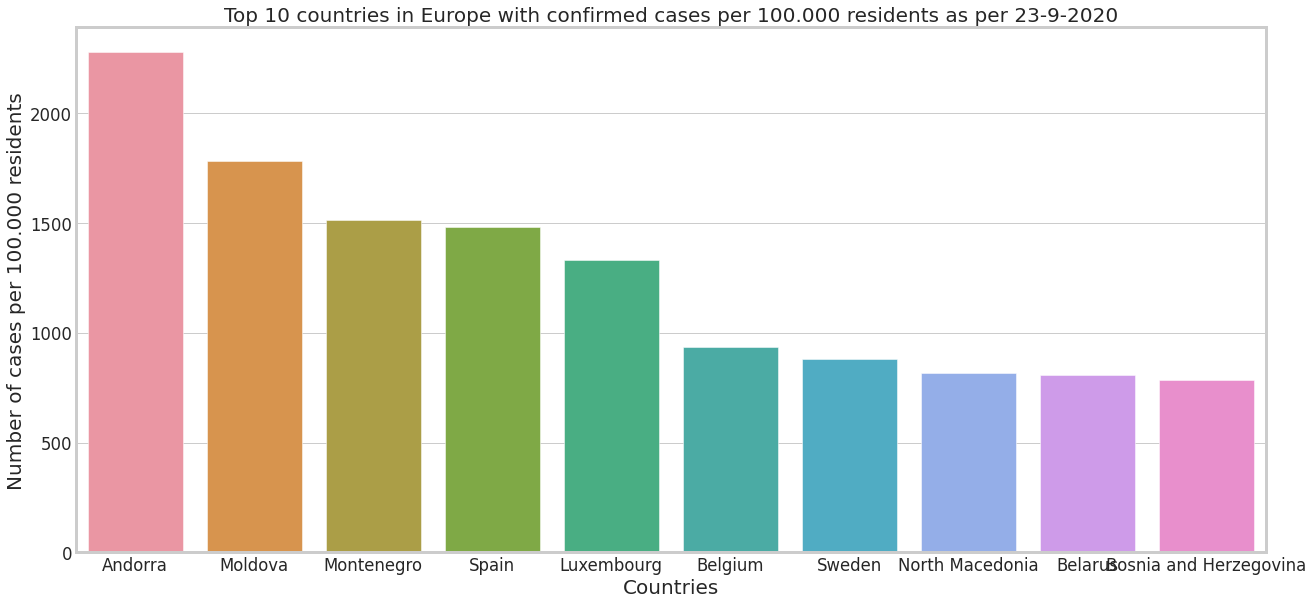

In [ ]:
plt.figure(figsize=[19,9])
sns.set_style("whitegrid")
sns.barplot(x="Country/Region",
            y="Confirmedper100000",
            data=Europe_pop.sort_values('Confirmedper100000', ascending=False).head(10),
           )
plt.title("Top 10 countries in Europe with confirmed cases per 100.000 residents as per {}".format(last_date),fontsize=20)
plt.ylabel('Number of cases per 100.000 residents',fontsize=20)
plt.xlabel('Countries',fontsize=20)
plt.figure
plt.show

<function matplotlib.pyplot.show>

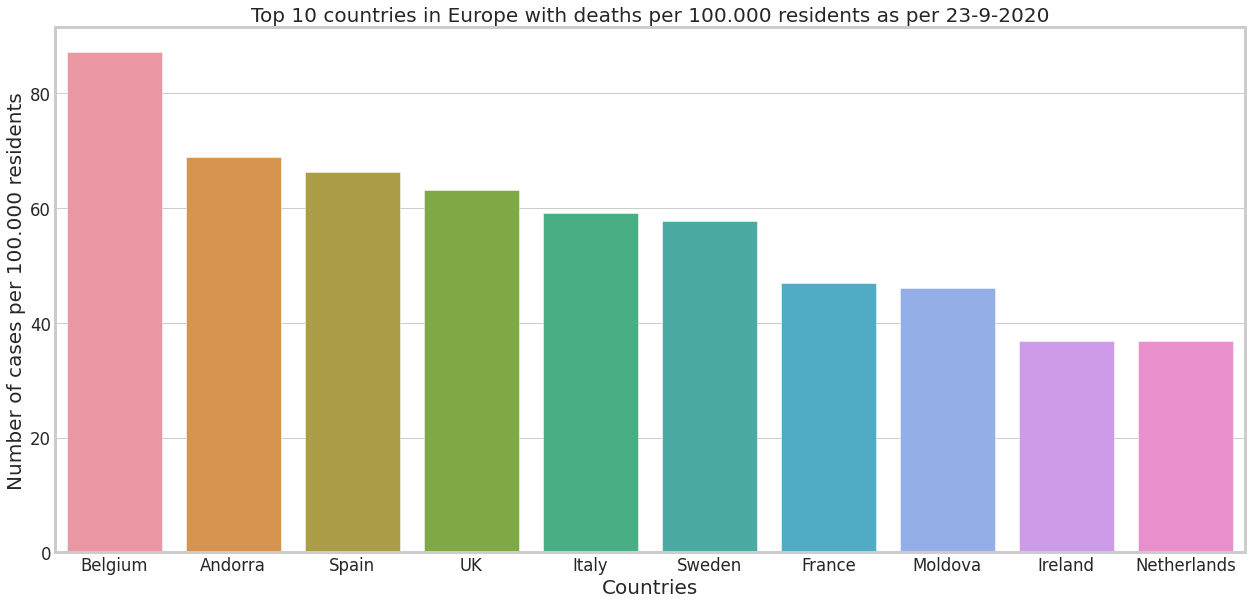

In [ ]:
plt.figure(figsize=[19,9])
sns.set_style("whitegrid")
sns.barplot(x="Country/Region",
            y="Deathsper100000",
            data=Europe_pop.sort_values('Deathsper100000', ascending=False).head(10),
           )
plt.title("Top 10 countries in Europe with deaths per 100.000 residents as per {}".format(last_date),fontsize=20)
plt.ylabel('Number of cases per 100.000 residents',fontsize=20)
plt.xlabel('Countries',fontsize=20)
plt.figure
plt.show

## Adding new dataset from https://www.kaggle.com/koryto/countryinfo?select=covid19countryinfo.csv

More info on lockdowns, dates that schools closed, GPD,healtchare info etc

In [ ]:
path1="https://raw.githubusercontent.com/niplessa/Datasets/main/covid19countryinfo.csv"
country = pd.read_csv(path1)

In [ ]:
#rename country to column to be consintent with the other datasets
country = country.rename(columns = {'country':'Country/Region'})

# Change population column to integer data types 
country['pop'] = country[country['pop'].notna()]['pop'].replace(',', '', regex=True).astype('int64')
pop_data = country.groupby('Country/Region').sum()['pop'].reset_index()


In [ ]:
# Get the necessary 
country_attr = country[['Country/Region','pop','density','medianage','urbanpop','sexratio','avgtemp','avghumidity','gdp2019']]

In [ ]:
# Change the gdp2019 into numeric
country_attr['gdp2019'] = country_attr['gdp2019'].replace(',', '', regex=True).astype('float')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
country_attr.head(10)

,Country/Region,pop,density,medianage,urbanpop,sexratio,avgtemp,avghumidity,gdp2019
0,Afghanistan,38928346.0,60.0,18.0,25.0,1.03,6.216667,56.933333,18734.0
1,Albania,2877797.0,105.0,36.0,63.0,0.98,13.950000,69.900000,15418.0
2,Algeria,43851044.0,18.0,29.0,73.0,1.03,19.566667,61.716667,172781.0
3,Andorra,77265.0,164.0,45.0,88.0,1.06,7.383333,75.233333,91527.0
4,Antigua and Barbuda,97929.0,223.0,34.0,26.0,0.90,NaN,NaN,1688.0
5,Argentina,45195774.0,17.0,32.0,93.0,0.98,32.816667,43.616667,445469.0
6,Armenia,2963243.0,104.0,35.0,63.0,0.94,7.100000,58.500000,13444.0
7,Netherlands,106766.0,593.0,41.0,44.0,0.90,26.533333,80.166667,2903.0
8,Australia,25499884.0,3.0,38.0,86.0,0.99,25.783333,64.233333,1376255.0
9,Austria,9006398.0,109.0,43.0,57.0,0.96,9.466667,65.350000,447718.0


In [ ]:
country_attr.isnull().sum()

Country/Region     0
pop               62
density           62
medianage         62
urbanpop          62
sexratio          63
avgtemp           97
avghumidity       97
gdp2019           60
dtype: int64

In [ ]:
country_attr = country_attr.groupby('Country/Region').mean().reset_index().dropna()

In [ ]:
country_attr

,Country/Region,pop,density,medianage,urbanpop,sexratio,avgtemp,avghumidity,gdp2019
0,Afghanistan,3.892835e+07,60.000000,18.000000,25.000000,1.030000,6.216667,56.933333,1.873400e+04
1,Albania,2.877797e+06,105.000000,36.000000,63.000000,0.980000,13.950000,69.900000,1.541800e+04
2,Algeria,4.385104e+07,18.000000,29.000000,73.000000,1.030000,19.566667,61.716667,1.727810e+05
3,Andorra,7.726500e+04,164.000000,45.000000,88.000000,1.060000,7.383333,75.233333,9.152700e+04
5,Argentina,4.519577e+07,17.000000,32.000000,93.000000,0.980000,32.816667,43.616667,4.454690e+05
6,Armenia,2.963243e+06,104.000000,35.000000,63.000000,0.940000,7.100000,58.500000,1.344400e+04
7,Australia,2.549988e+07,3.000000,38.000000,86.000000,0.990000,25.783333,64.233333,1.376255e+06
8,Austria,9.006398e+06,109.000000,43.000000,57.000000,0.960000,9.466667,65.350000,4.477180e+05
9,Azerbaijan,1.013918e+07,123.000000,32.000000,56.000000,0.980000,10.166667,68.083333,4.717100e+04
10,Bahamas,3.932440e+05,39.000000,32.000000,86.000000,0.960000,23.266667,76.550000,1.216000e+04


In [ ]:
Europe_merge = pd.merge(df_Europe, country_attr, how='inner', on=['Country/Region'])

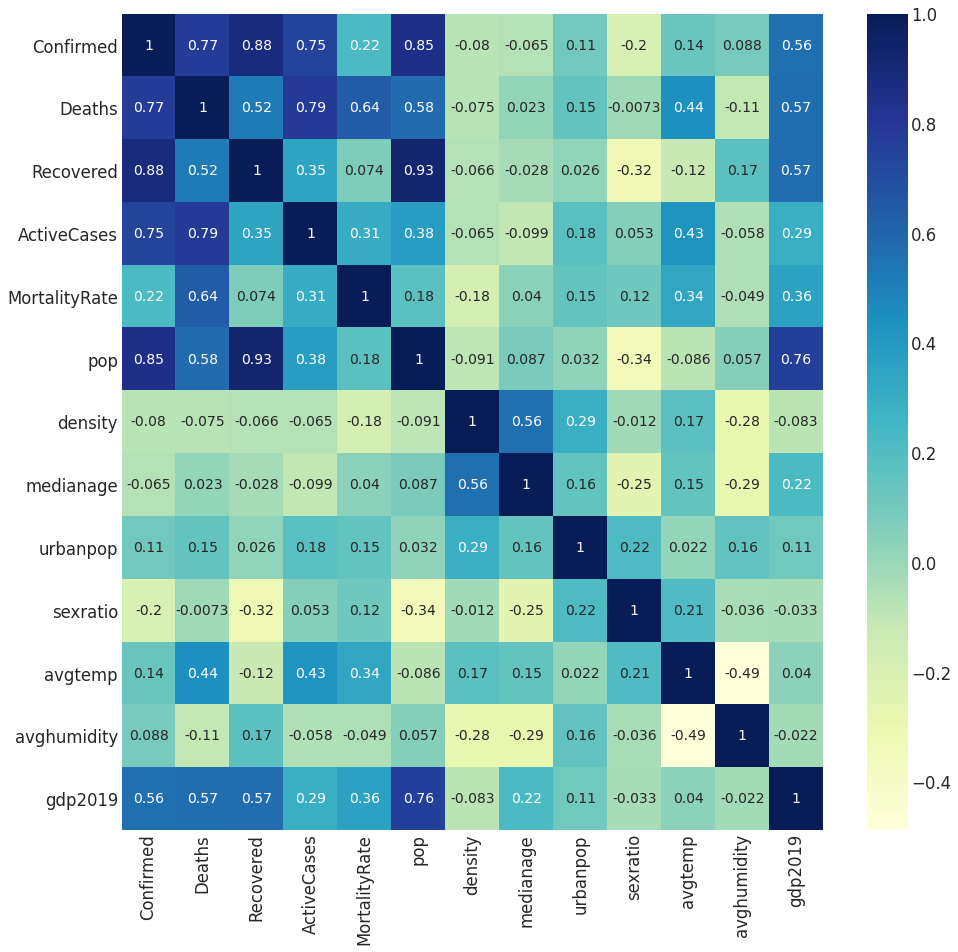

In [ ]:
plt.figure(figsize=[14,14])
sns.heatmap(Europe_merge.corr(), annot=True,cmap="YlGnBu")

## Correlations
[How to read a Correlation Matrix](https://www.statology.org/what-is-a-strong-correlation/)



- Strong correlations between GDP (ακαθάριστο εθνικό προιόν) and Confirmed/Deaths

- GDP also correlates with population.

- So richest countries -> more cases/deaths? More tests?

- Also Deaths -> avgtemp?



In [ ]:
#interactive scatter map (Confirmed vs GDP)
px.scatter(Europe_merge, x='gdp2019', y='Confirmed', color='Country/Region', text='Country/Region').update_layout(title='Confirmed Cases vs GDP 2019 in Europe', xaxis_type='log', yaxis_type='log',showlegend=False,autosize=False,
    width=1200,
    height=600)\
.update_traces(textposition='top center', textfont_size=20)


In [ ]:
#interactive scatter map (Confirmed vs GDP)
px.scatter(Europe_merge, x='gdp2019', y='Deaths', color='Country/Region', text='Country/Region').update_layout(title='Deaths vs GDP 2019 in Europe', xaxis_type='log', yaxis_type='log',showlegend=False,autosize=False,
    width=1200,
    height=600)\
.update_traces(textposition='top center', textfont_size=20)


Text(0.5, 1.0, 'Country Population vs Confirmed Cases (Europe)')

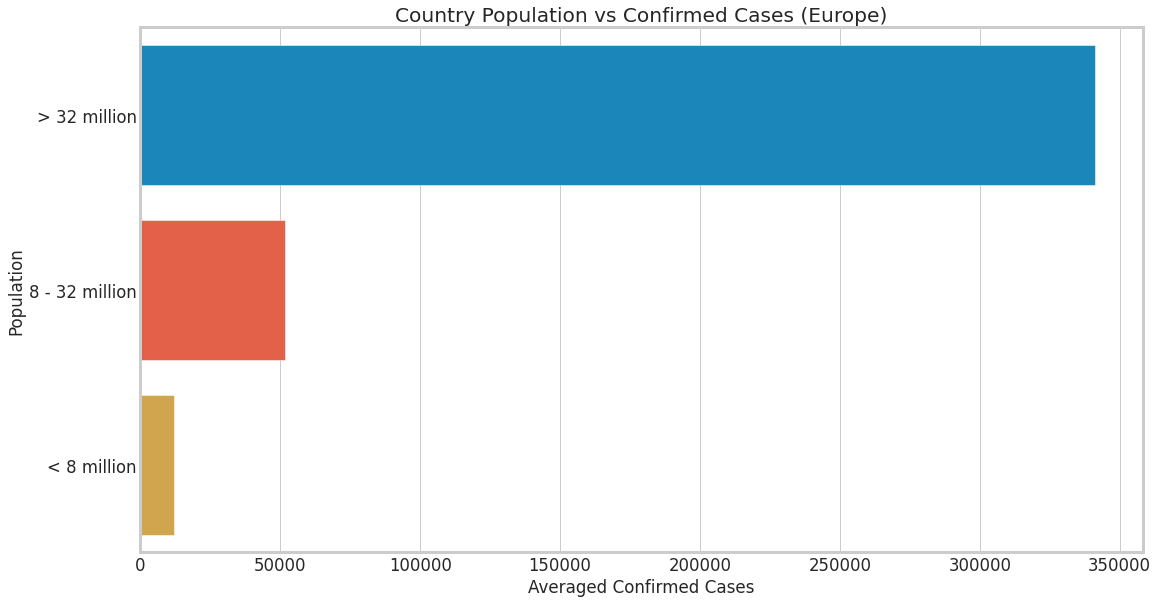

In [ ]:
Europe_merge['pop_label'] = Europe_merge['pop'].apply(lambda x: '> 32 million' if x > Europe_merge['pop'].describe()[6] else ('8 - 32 million' if (x > Europe_merge['pop'].median()) & (x < Europe_merge['pop'].describe()[6]) else '< 8 million' ))
con = Europe_merge.groupby('pop_label').mean()['Confirmed'].reset_index().sort_values('Confirmed', ascending=False)

plt.figure(figsize=[16,9])
sns.barplot(x='Confirmed', y='pop_label', data =con, order = con['pop_label'])
plt.ylabel('Population')
plt.xlabel('Averaged Confirmed Cases')
plt.title('Country Population vs Confirmed Cases (Europe)')


In [ ]:
fig = px.scatter(Europe_merge, x='medianage', y='Deaths', color='Country/Region', text='Country/Region').update_layout(title='Median Age vs Number of COVID-19 Deaths by Country', xaxis_type='log', yaxis_type='log',showlegend=False,autosize=False,
    width=1200,
    height=700)\
.update_traces(textposition='top center', textfont_size=20)
fig.layout.template = 'seaborn'
fig.show()


In [ ]:
fig = px.scatter(Europe_merge, x='medianage', y='MortalityRate', color='Country/Region', text='Country/Region').update_layout(title='Median Age vs Mortality Rate by Country', xaxis_type='log', yaxis_type='log',showlegend=False,autosize=False,
    width=1200,
    height=700)\
.update_traces(textposition='top center', textfont_size=16)
fig.layout.template = 'seaborn'
fig.show()


Text(0.5, 1.0, 'Median Age of Countries vs Average Number of Death')

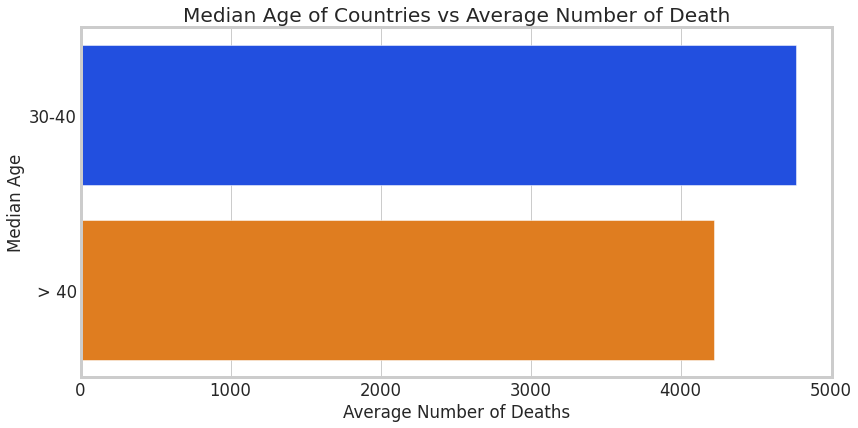

In [ ]:
Europe_merge['medianage_label'] = Europe_merge['medianage'].apply(lambda x: '> 40' if x > 40 else ('30-40' if (x <=40) & (x >=30) else '< 30'))
ma = Europe_merge.groupby('medianage_label').mean()['Deaths'].reset_index().sort_values('Deaths', ascending=False)
plt.figure(figsize=[12,6])
sns.barplot(x='Deaths', y='medianage_label', data =ma, palette='bright')
plt.ylabel('Median Age')
plt.xlabel('Average Number of Deaths')
plt.title('Median Age of Countries vs Average Number of Death')


In [ ]:
fig = px.scatter(Europe_merge, x='avgtemp', y='Deaths', color='Country/Region', text='Country/Region').update_layout(title='Temperature to Deaths Correlation (?)', xaxis_type='log', yaxis_type='log',showlegend=False,autosize=False,
    width=1200,
    height=700)\
.update_traces(textposition='top center', textfont_size=16)
fig.layout.template = 'seaborn'
fig.show()


## Cases and Deaths vs Healtchare


In [ ]:
# Getting the necessary column and drop row with missing values
country_health = country[['Country/Region','hospibed','smokers','lung','malelung','femalelung','healthexp','healthperpop']]
country_health['healthexp'] = country_health['healthexp'].replace(',', '', regex=True).astype('float')
country_health = country_health.groupby('Country/Region').mean().dropna()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Europe_health_merge = pd.merge(df_Europe, country_health, how='inner', on=['Country/Region'])


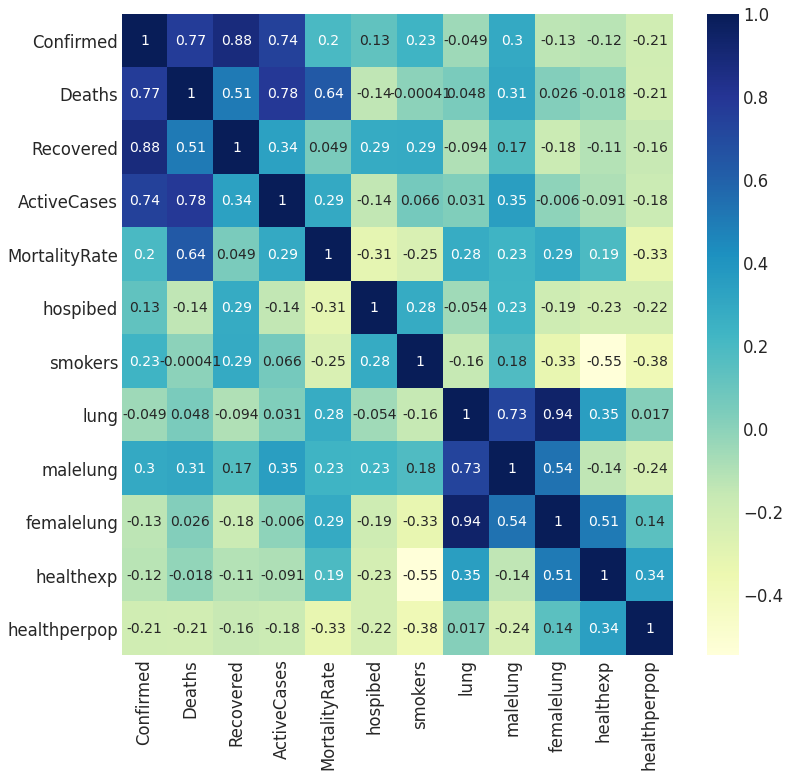

In [ ]:
plt.figure(figsize=[11,11])
sns.heatmap(Europe_health_merge.corr(), annot=True,cmap="YlGnBu")


## Correlations:
[How to read a Correlation Matrix](https://www.statology.org/what-is-a-strong-correlation/)

- Strong Negative Correlations between healthexp,healthperpop and hospibed and Mortality Rate. Seems fair.

- Negative correlation between smokers and 


In [ ]:
px.scatter(Europe_health_merge, x='hospibed', y='MortalityRate', color='Country/Region', text='Country/Region').update_layout(xaxis_type='log', yaxis_type='log',title='Mortality Rate vs Hospital Beds',showlegend=False,autosize=False,
    width=1200,
    height=700)\
.update_traces(textposition='top center', textfont_size=20)


In [ ]:
px.scatter(Europe_health_merge, x='healthperpop', y='MortalityRate', color='Country/Region', text='Country/Region').update_layout(xaxis_type='log', yaxis_type='log',title='Mortality Rates vs Health Expensers per population',showlegend=False,autosize=False,
    width=1200,
    height=700)\
.update_traces(textposition='top center', textfont_size=20)


In [ ]:
px.scatter(Europe_health_merge, x='smokers', y='MortalityRate', color='Country/Region', text='Country/Region').update_layout(xaxis_type='log', yaxis_type='log',title='Mortality Rate vs smokers percent',showlegend=False,autosize=False,
    width=1200,
    height=700)\
.update_traces(textposition='top center', textfont_size=20)


## OurWorldInData (owid) has issued a dataset with more than 35 variables including testing

link here: https://github.com/owid/covid-19-data/tree/master/public/data

variable explanation: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv




In [ ]:
path = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
owid = pd.read_csv(path)

In [ ]:
# Change date column to datetime data types
owid['date'] = pd.to_datetime(owid['date'])
owid['date'] = owid['date'].apply(lambda x: x.date())

Create new dataset for Europe

In [ ]:
dfEur = owid[owid['continent']=="Europe"]

In [ ]:
#Εύρεση μεγαλύτερης ημερομηνίας του Dataset
d = owid['date'][-1:].astype('str')
year = int(d.values[0].split('-')[0])
month = int(d.values[0].split('-')[1])
day = int(d.values[0].split('-')[2].split()[0])

print("\nLast update: {}-{}-{}\n".format(year,month,day))
last_date = str(day)+"-"+str(month)+"-"+str(year)
#print(last_date)

#data_latest : last date in datetime
data_latest = dfEur[dfEur['date'] >= pd.Timestamp(date(year,month,day))]
Europe_cases=data_latest.sort_values(by=['total_cases'],ascending=False).reset_index(drop=True)
Europe_cases=Europe_cases.fillna(0)
Europe_cases.style.background_gradient(cmap='Blues')


Last update: 2021-2-4



In [ ]:
# Get the necessary 
Europe_cases = Europe_cases[['location','total_cases','total_deaths','total_tests','population','median_age','gdp_per_capita','extreme_poverty','hospital_beds_per_thousand','life_expectancy','human_development_index']]

In [ ]:
Europe_cases = Europe_cases.groupby('location').mean().reset_index().dropna()

In [ ]:
Europe_cases.head()

,location,total_cases,total_deaths,total_tests,population,median_age,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Albania,81993.0,1418.0,0.0,2877800.0,38.0,11803.431,1.1,2.89,78.57,0.785
1,Andorra,10137.0,103.0,0.0,77265.0,0.0,0.000,0.0,0.00,83.73,0.858
2,Austria,419801.0,7936.0,0.0,9006400.0,44.4,45436.686,0.7,7.37,81.54,0.908
3,Belarus,253413.0,1755.0,0.0,9449321.0,40.3,17167.967,0.0,11.00,74.79,0.808
4,Belgium,718847.0,21260.0,0.0,11589616.0,41.8,42658.576,0.2,5.64,81.63,0.916


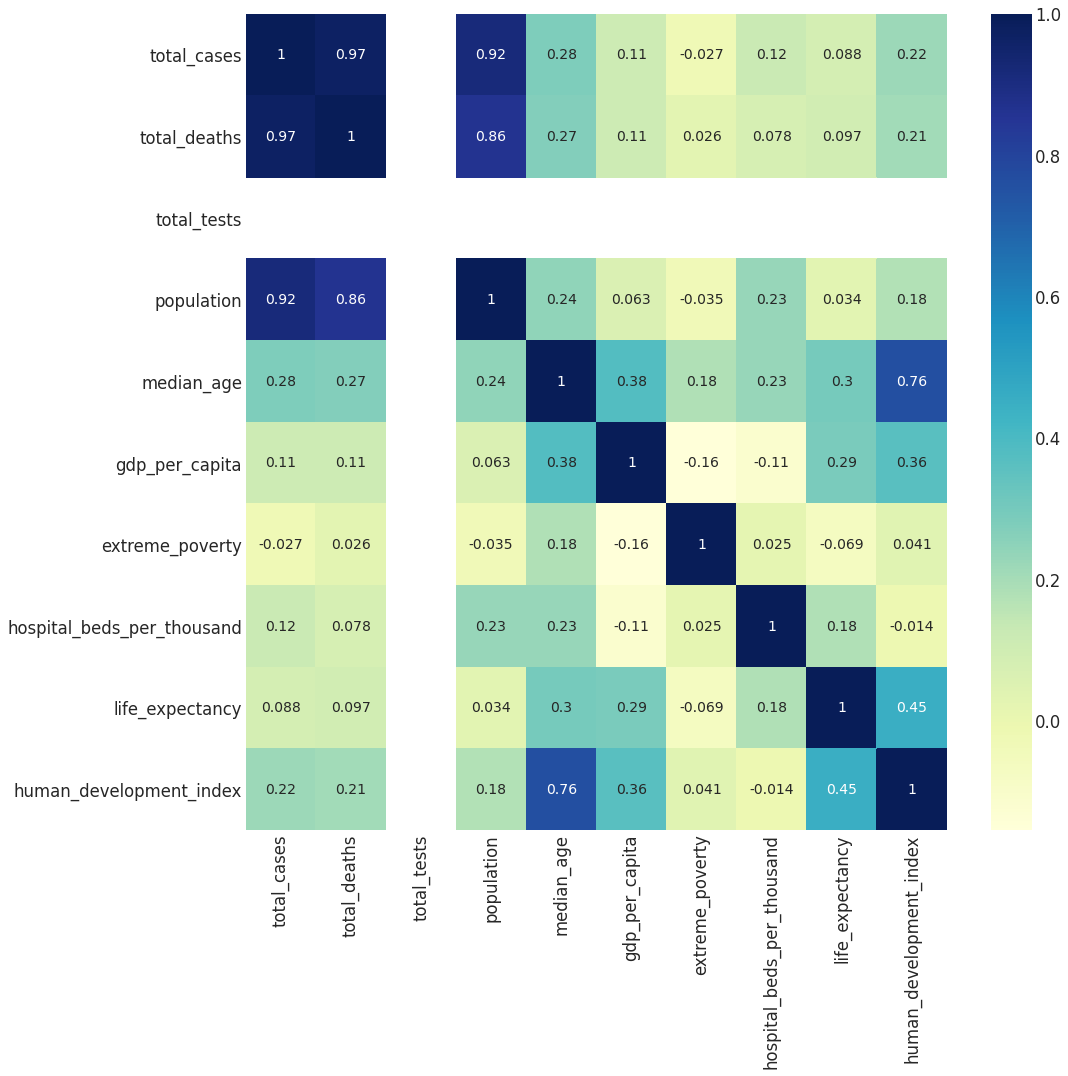

In [ ]:
plt.figure(figsize=[14,14])
sns.heatmap(Europe_cases.corr(), annot=True,cmap="YlGnBu")